1번

In [2]:
# 1-1
import math

def sigmoid(x):
  # sigmoid 식
  y = 1 / (1 + math.exp(-x))
  return y

print(sigmoid(0.5)) # 출력

0.6224593312018546


In [3]:
# 1-2
import numpy as np
import math

def sigmoid_list(x_list):
  y = np.zeros((len(x_list),1))
  
  # 각 리스트의 원소를 sigmoid() 함수에 넣기
  for i in range(len(x_list)):
    y[i][0] = sigmoid(x_list[i])
  
  return y.tolist() # 결과 값 리스트 형태로 반환

print(sigmoid_list([0, 1, 2])) # 출력

[[0.5], [0.7310585786300049], [0.8807970779778823]]


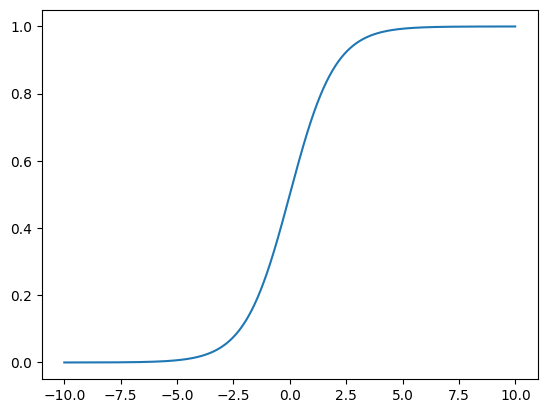

In [5]:
# 1-3
from matplotlib import pyplot as plt

x_list = np.arange(-10, 10, 0.01) # -10 <= x <= 10, 간격 = 0.01
plt.plot(x_list,sigmoid_list(x_list))

2번

In [ ]:
# 2-1
import pandas as pd

df = pd.read_csv('ann_data.csv')
df['class'] = df['class'].map({1: 1.0, 0: -1.0}) # class 0 -> -1.0, 1 -> 1.0

df


,x1,x2,class
0,0.40,0.30,1.0
1,0.30,0.80,-1.0
2,0.20,0.70,-1.0
3,0.70,0.40,1.0
4,0.60,0.20,1.0
5,0.15,0.60,-1.0
6,0.12,0.80,-1.0
7,0.20,0.40,-1.0
8,0.50,0.60,1.0
9,0.65,0.55,1.0


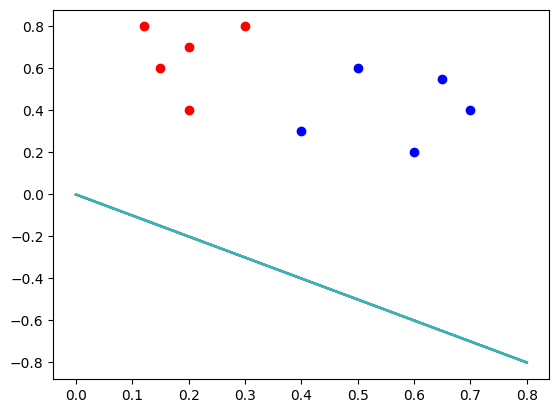

In [ ]:
# 2-2
def visualize(df,w,b):
  for idx in range(len(df)):
    x1_1 = 0
    y1_1 = (-w[0]*x1_1-b)/w[1]
    x1_2 = 0.8
    y1_2 = (-w[0]*x1_2-b)/w[1]
    
    # plot samples
    if df.iloc[idx,2] == 1:
      plt.plot(df.iloc[idx,0],df.iloc[idx,1],'bo')
    else:
      plt.plot(df.iloc[idx,0],df.iloc[idx,1],'ro')

    # plot classifier
    
    plt.plot([x1_1,x1_2],[y1_1,y1_2])

w = [0.5, 0.5]
b = 0

visualize(df, w, b)

In [ ]:
# 2-3

# 활성화 함수 : sigmoid
def sigmoid_list(x_list):
  y = np.zeros((len(x_list),1))
  
  for i in range(len(x_list)):
    y[i][0] = sigmoid(x_list[i])
  
  return y

# z = wx + b 구하는 함수
def zeta(w,b,x1,x2):
  z = np.zeros((10,1))
  for idx in range(10):
    # z = w1x1 + w2xw2 + b
    z[idx] = x1[idx] * w[0] + x2[idx] * w[1] + b
  return z

x1 = np.array(df.iloc[:,0:1]) # data1
x2 = np.array(df.iloc[:,1:2]) # data2
tn = np.array(df.iloc[:,2:3]) # target

w = [0.5, 0.5]
b = 0

y = sigmoid_list(zeta(w,b,x1,x2)) # 예측값
print(y[0])

[0.58661758]


In [ ]:
df

,x1,x2,class
0,0.40,0.30,1.0
1,0.30,0.80,-1.0
2,0.20,0.70,-1.0
3,0.70,0.40,1.0
4,0.60,0.20,1.0
5,0.15,0.60,-1.0
6,0.12,0.80,-1.0
7,0.20,0.40,-1.0
8,0.50,0.60,1.0
9,0.65,0.55,1.0


In [ ]:
# 2-4
w = [0.5, 0.5] # initial weights 
b = 0 # initial bias
mu = 0.2 # learning late

x1 = np.array(df.iloc[:,0:1]) # data1
x2 = np.array(df.iloc[:,1:2]) # data2
tn = np.array(df.iloc[:,2:3]) # target data

for i in range(5000):
  y = sigmoid_list(zeta(w,b,x1,x2))
  
  # parameter update (chain rule)
  w[0] = w[0] + mu * ((tn - y) * y * (np.ones((10, 1)) - y) * x1).sum()
  w[1] = w[1] + mu * ((tn - y) * y * (np.ones((10, 1)) - y) * x2).sum()
  b = b + mu * ((tn - y) * y * (np.ones((10, 1)) - y)).sum()
  
print(w)
print(b)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [2.27550715e-02]
 [8.51641362e-01]
 [9.97135606e-01]]

[[8.82235467e-01]
 [7.19520584e-03]
 [1.55803074e-03]
 [9.99780180e-01]
 [9.99585366e-01]
 [1.13479923e-03]
 [9.02471973e-05]
 [2.27504971e-02]
 [8.51660008e-01]
 [9.97136684e-01]]

[[8.82247172e-01]
 [7.19373222e-03]
 [1.55754512e-03]
 [9.99780290e-01]
 [9.99585544e-01]
 [1.13440550e-03]
 [9.02056187e-05]
 [2.27459245e-02]
 [8.51678648e-01]
 [9.97137761e-01]]

[[8.82258873e-01]
 [7.19225918e-03]
 [1.55705976e-03]
 [9.99780400e-01]
 [9.99585723e-01]
 [1.13401198e-03]
 [9.01640678e-05]
 [2.27413539e-02]
 [8.51697281e-01]
 [9.97138838e-01]]

[[8.82270571e-01]
 [7.19078673e-03]
 [1.55657465e-03]
 [9.99780510e-01]
 [9.99585901e-01]
 [1.13361869e-03]
 [9.01225447e-05]
 [2.27367850e-02]
 [8.51715908e-01]
 [9.97139914e-01]]

[[8.82282265e-01]
 [7.18931486e-03]
 [1.55608978e-03]
 [9.99780620e-01]
 [9.99586079e-01]
 [1.13322561e-03]
 [9.00810493e-05]
 [2.27322181e-02]
 [8.51734529e-01]
 [9.97140990e-01]]

In [ ]:
sigmoid_list(zeta(w,b,x1,x2))

array([[8.87198792e-01],
       [6.58153235e-03],
       [1.36080992e-03],
       [9.99823031e-01],
       [9.99655905e-01],
       [9.76196560e-04],
       [7.38924533e-05],
       [2.08493074e-02],
       [8.59511513e-01],
       [9.97566564e-01]])

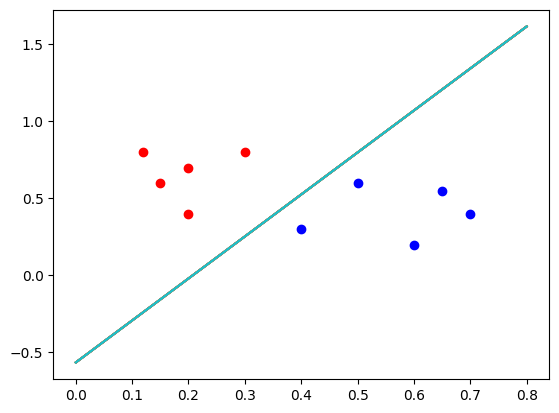

In [ ]:
# 2-5
def visualize(df,w,b):
  for idx in range(len(df)):
    # 최종 업데이트 된 파라미터들로 예측값 구하기 
    x1_1 = 0
    y1_1 = (-w[0]*x1_1-b)/w[1]
    x1_2 = 0.8
    y1_2 = (-w[0]*x1_2-b)/w[1]
    
    # plot samples
    if df.iloc[idx,2] == 1:
      plt.plot(df.iloc[idx,0],df.iloc[idx,1],'bo')
    else:
      plt.plot(df.iloc[idx,0],df.iloc[idx,1],'ro')

    # plot classifier
    
    plt.plot([x1_1,x1_2],[y1_1,y1_2])

visualize(df, w, b)